In [8]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,log_loss


In [9]:
df=pd.read_csv("data_ecommerce_customer_churn.csv")
df.dropna(inplace=True)
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
5,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
...,...,...,...,...,...,...,...,...,...,...,...
3935,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


In [10]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,2,3,2,2,0,7.0,143.32,0
1,7.0,25.0,4,3,1,1,2,0,7.0,129.29,0
2,27.0,13.0,3,2,1,1,5,0,7.0,168.54,0
4,30.0,15.0,4,5,4,2,8,0,8.0,322.17,0
5,7.0,16.0,4,4,2,0,2,0,11.0,152.81,0
...,...,...,...,...,...,...,...,...,...,...,...
3935,26.0,7.0,4,1,1,1,4,0,9.0,295.99,0
3936,28.0,9.0,5,0,3,1,8,0,1.0,231.86,0
3937,8.0,7.0,2,4,2,2,4,0,4.0,157.80,0
3938,30.0,6.0,5,2,3,1,3,1,2.0,156.60,0


In [12]:
x=df.drop(columns="Churn")
y=df["Churn"]
y

0       0
1       0
2       0
4       0
5       0
       ..
3935    0
3936    0
3937    0
3938    0
3940    0
Name: Churn, Length: 3365, dtype: int64

In [13]:
stand=StandardScaler()
X=stand.fit_transform(x)
X

array([[ 0.56654968,  1.56079586,  0.29400165, ..., -0.62903612,
         0.60237086, -0.75497042],
       [-0.37333554,  1.09089534,  0.29400165, ..., -0.62903612,
         0.60237086, -1.04552905],
       [ 1.97637751, -0.3188062 , -0.68261785, ..., -0.62903612,
         0.60237086, -0.23266902],
       ...,
       [-0.25584988, -1.02365698, -1.65923735, ..., -0.62903612,
        -0.21167651, -0.45509238],
       [ 2.32883447, -1.14113211,  1.27062115, ...,  1.58973384,
        -0.75437475, -0.47994415],
       [-0.9607638 , -1.02365698, -0.68261785, ..., -0.62903612,
        -0.75437475, -0.5393813 ]], shape=(3365, 10))

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
model=Sequential()
model.add(Dense(320,activation="relu"))
model.add(Dense(160,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(1,activation="sigmoid"))




In [17]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [18]:
early=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

In [19]:
history=model.fit(
    x_train,y_train,
    verbose=1,
    epochs=20,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early]
    )



Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7585 - loss: 0.5680 - val_accuracy: 0.8349 - val_loss: 0.4391
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8518 - loss: 0.3856 - val_accuracy: 0.8349 - val_loss: 0.3874
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8546 - loss: 0.3267 - val_accuracy: 0.8516 - val_loss: 0.3582
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8751 - loss: 0.3011 - val_accuracy: 0.8701 - val_loss: 0.3510
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8857 - loss: 0.2875 - val_accuracy: 0.8738 - val_loss: 0.3376
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8941 - loss: 0.2735 - val_accuracy: 0.8720 - val_loss: 0.3254
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8922 - loss: 0.2630 - val_accuracy: 0.8831 - val_loss: 0.3157
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9043 - loss: 0.2525 - val_accuracy: 0.8850 - val_loss: 0.3094


In [20]:
loss,accuracy=model.evaluate(x_test,y_test)
print("loss:",loss)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9198 - loss: 0.2172 
loss: 0.2171945720911026


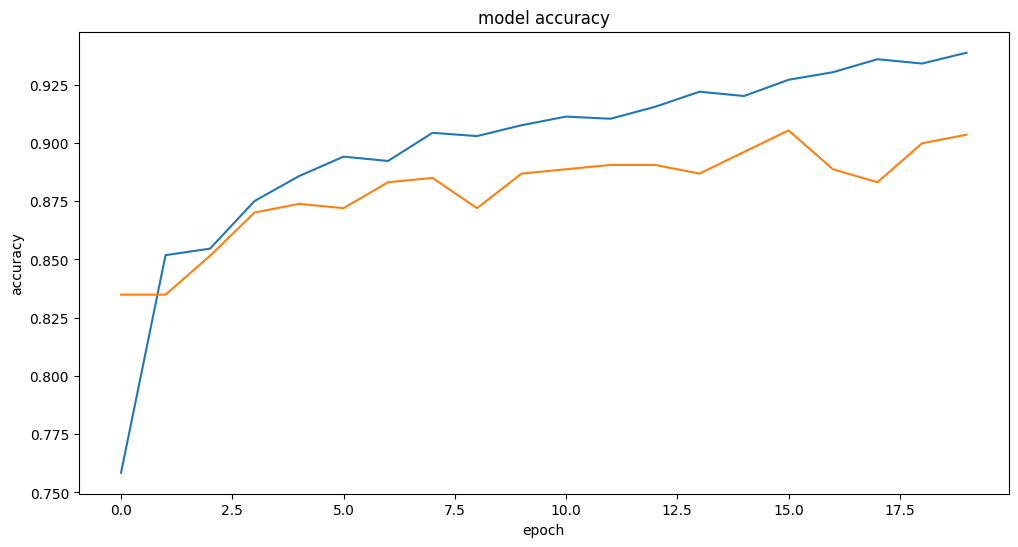

In [21]:
plt.figure(figsize=(12,6))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy") 
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

In [24]:
new=np.array([[0,0,0,1,1,1,1,1,1,1]])
new=stand.transform(new)
pred=model.predict(new)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[0.07702909]]


c:\Users\AKASH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
